In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/priyapa/Desktop/PM/Heart_Attack_Analysis_Data.csv")

In [3]:
df

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,0,0
301,57,1,0,130,131,0,1,115,1,0,0


In [4]:
df.shape

(303, 11)

In [5]:
df.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


In [6]:
df.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   CP_Type         303 non-null    int64
 3   BloodPressure   303 non-null    int64
 4   Cholestrol      303 non-null    int64
 5   BloodSugar      303 non-null    int64
 6   ECG             303 non-null    int64
 7   MaxHeartRate    303 non-null    int64
 8   ExerciseAngina  303 non-null    int64
 9   FamilyHistory   303 non-null    int64
 10  Target          303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


## Age, Sex, Exercise Include Angina(1=YES, 0=NO), CP_Type (Chest Pain)(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), ECG Results, Blood Pressure, Cholesterol, Blood Sugar, Family History (Number of persons affected in the family), Maximum Heart Rate, Target -0=LESS CHANCE , 1= MORE CHANCEimage.png

## Features decide heart_attack high cholesterol, high blood pressure, diabetes, weight, family history. Other factors include stress, alcohol and poor diet/nutrition.


In [8]:
df.sample(5)

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
187,54,1,0,124,266,0,0,109,1,3,0
127,67,0,2,152,277,0,1,172,0,1,1
233,64,1,0,120,246,0,0,96,1,0,0
183,58,1,2,112,230,0,0,165,0,2,0
102,63,0,1,140,195,0,1,179,0,1,1


## a) Preprocess the data to enhance quality

In [9]:
df.isnull().sum()

Age               0
Sex               0
CP_Type           0
BloodPressure     0
Cholestrol        0
BloodSugar        0
ECG               0
MaxHeartRate      0
ExerciseAngina    0
FamilyHistory     0
Target            0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

## So, we have no missing values¶

In [11]:
print(df.corr()["Target"].abs().sort_values(ascending=False))

Target            1.000000
ExerciseAngina    0.436757
CP_Type           0.433798
MaxHeartRate      0.421741
Sex               0.280937
Age               0.225439
BloodPressure     0.144931
ECG               0.137230
Cholestrol        0.085239
FamilyHistory     0.028822
BloodSugar        0.028046
Name: Target, dtype: float64


## b) Carry out descriptive summarization of data and make observations

## Exploratory Data Analysis (EDA)

In [12]:
y = df["Target"]


1    165
0    138
Name: Target, dtype: int64


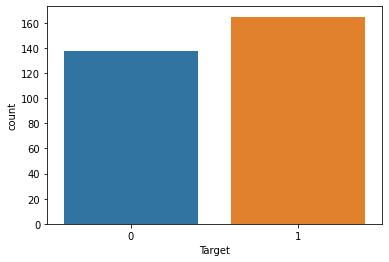

In [13]:
ax = sns.countplot(df["Target"])
target_temp = df.Target.value_counts()
print(target_temp)

## From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

## Percentage of patient with or without heart problems in the given dataset


In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


## c)	Identify relevant, irrelevant attributes for building model

In [15]:
df["Sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='Sex', ylabel='Target'>

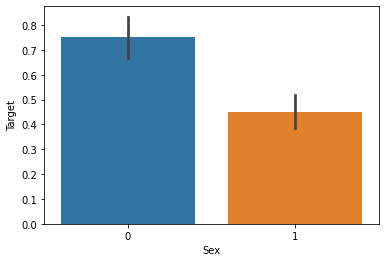

In [16]:
sns.barplot(df["Sex"],df["Target"])

## Here 0 is female and 1 is male patients


In [17]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.Sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.Sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


## Heart Disease Frequency for ages

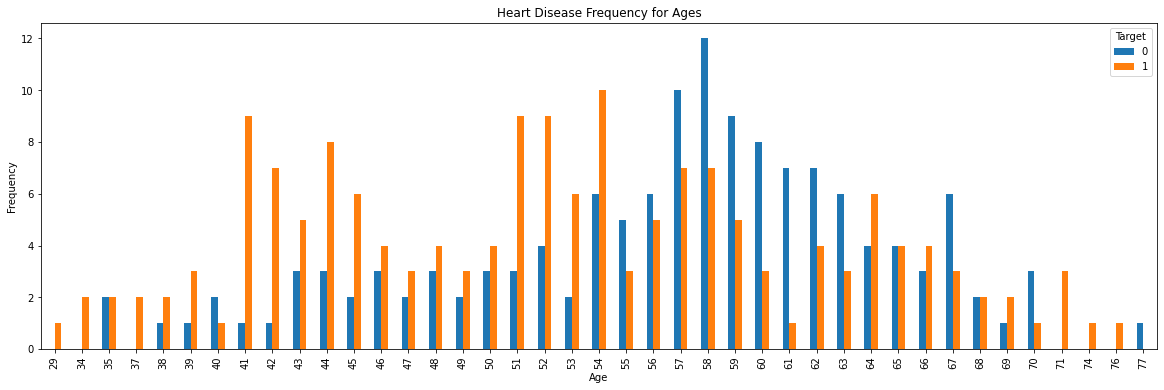

In [18]:
pd.crosstab(df.Age,df.Target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

## Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

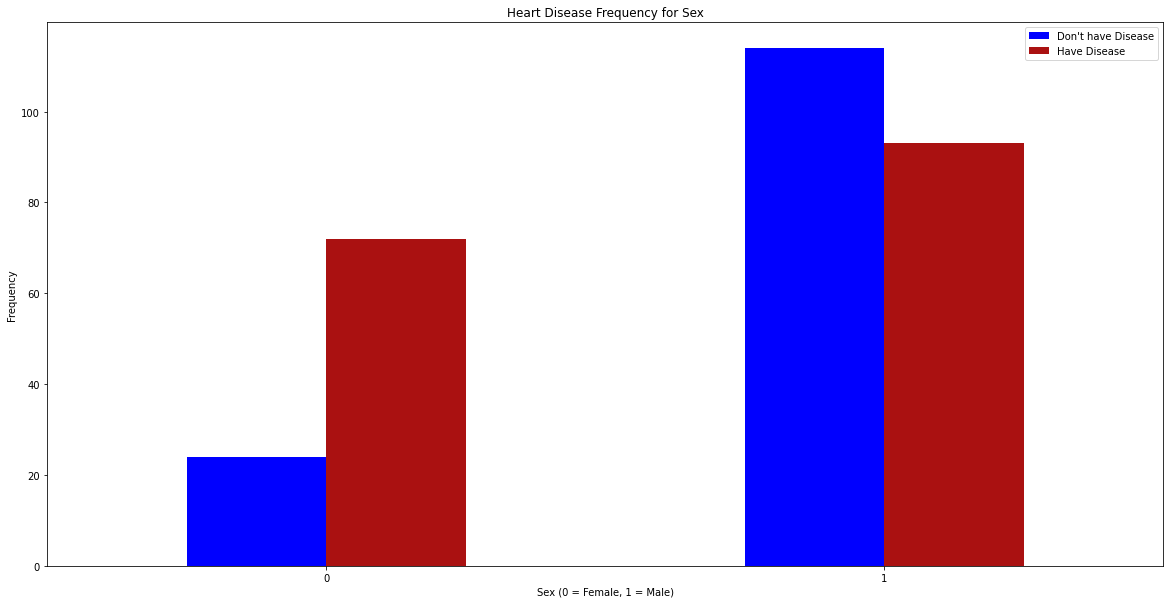

In [19]:
pd.crosstab(df.Sex,df.Target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

#run this line after prediction

## d)	Use data visualization tools and make observations

In [21]:
df.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


## Heart disease according to  Blood sugar

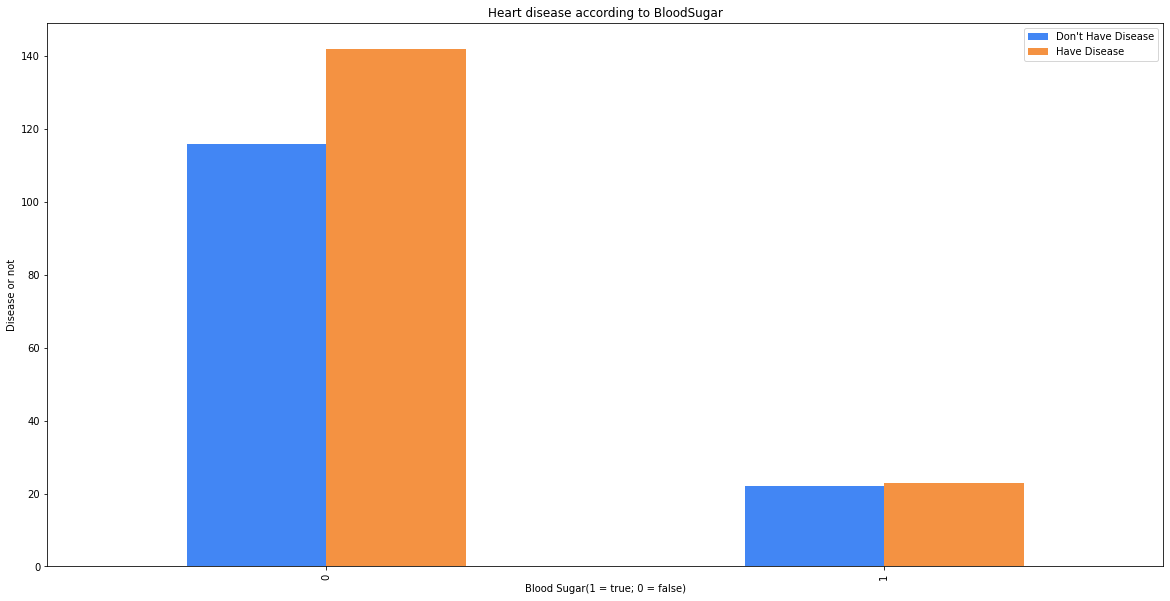

In [22]:
pd.crosstab(df.BloodSugar,df.Target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to BloodSugar")
plt.xlabel('Blood Sugar(1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

## Analysing the chest pain (4 types of chest pain)

## CP_Type (Chest Pain)(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

In [23]:
df["CP_Type"].unique()

array([3, 2, 1, 0])

<AxesSubplot:xlabel='CP_Type', ylabel='Target'>

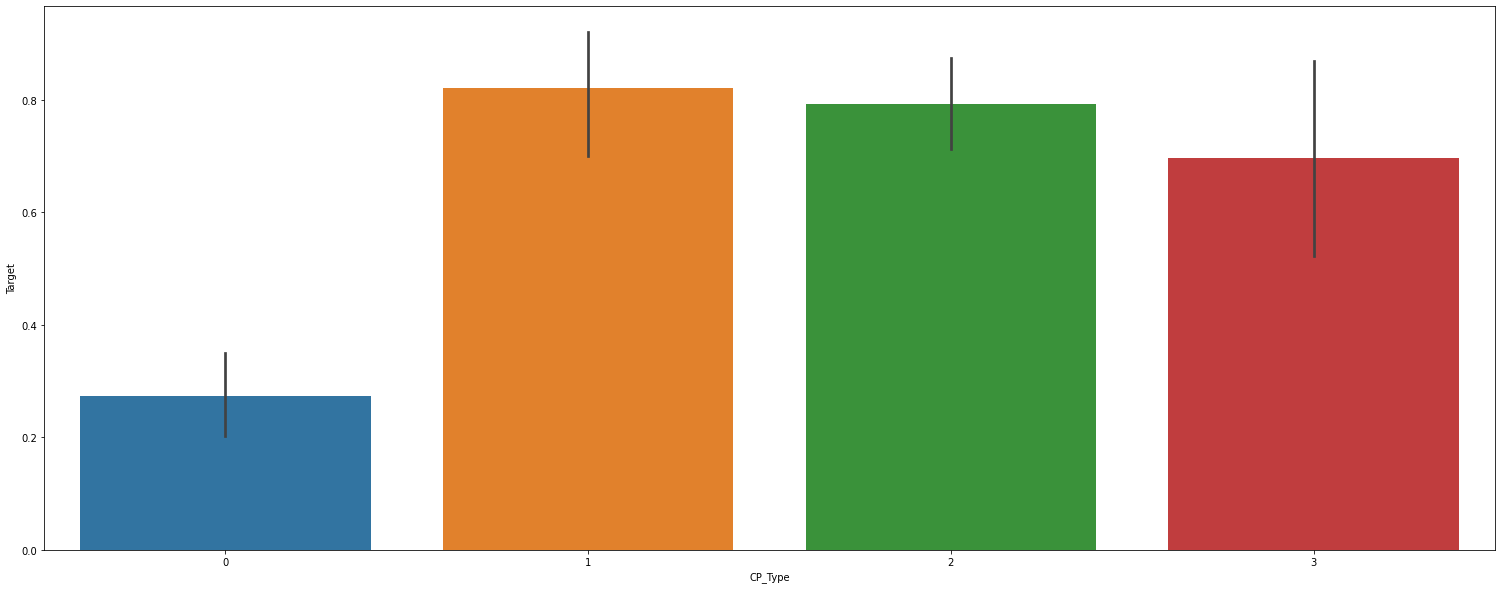

In [24]:
plt.figure(figsize=(26, 10))
sns.barplot(df["CP_Type"],y)

## Analysing The person's  blood pressure (mm Hg on admission to the hospital)

In [25]:
df["BloodPressure"].unique()


array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

<AxesSubplot:xlabel='BloodPressure', ylabel='Target'>

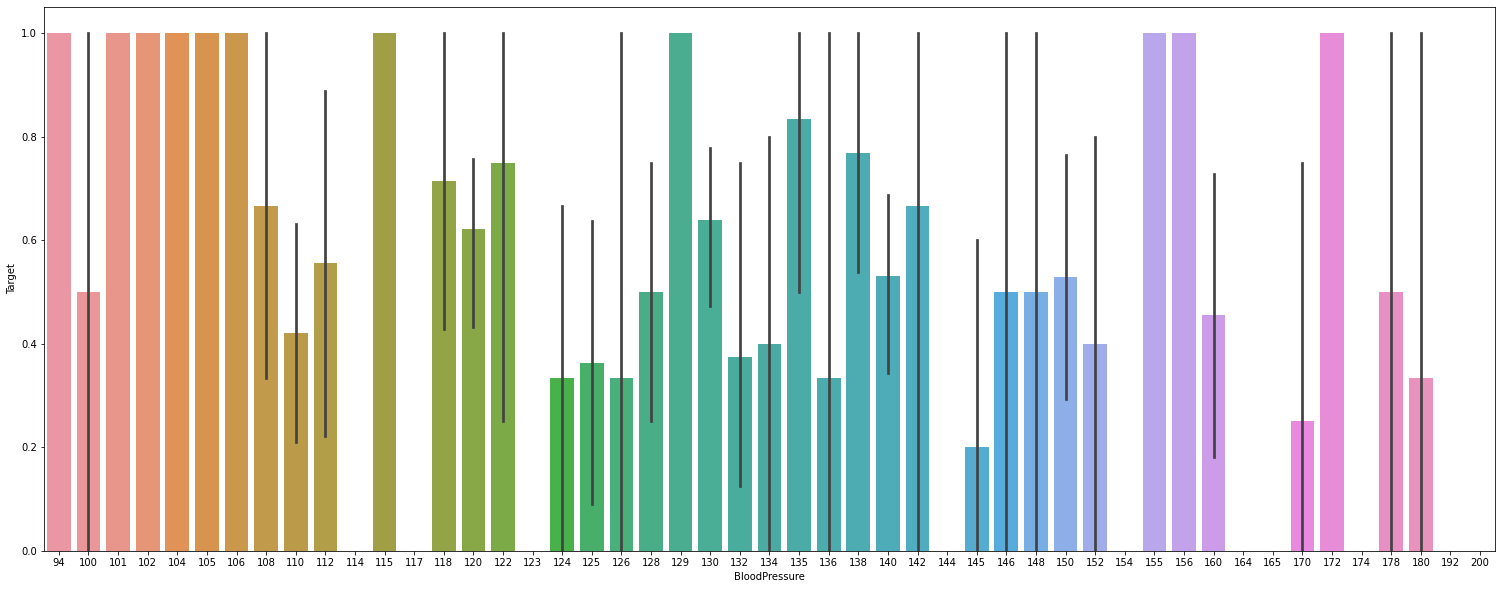

In [26]:
plt.figure(figsize=(26, 10))
sns.barplot(df["BloodPressure"],y)

## Analysing the ECG (0,1,2)

In [27]:
df["ECG"].unique()


array([0, 1, 2])

<AxesSubplot:xlabel='ECG', ylabel='Target'>

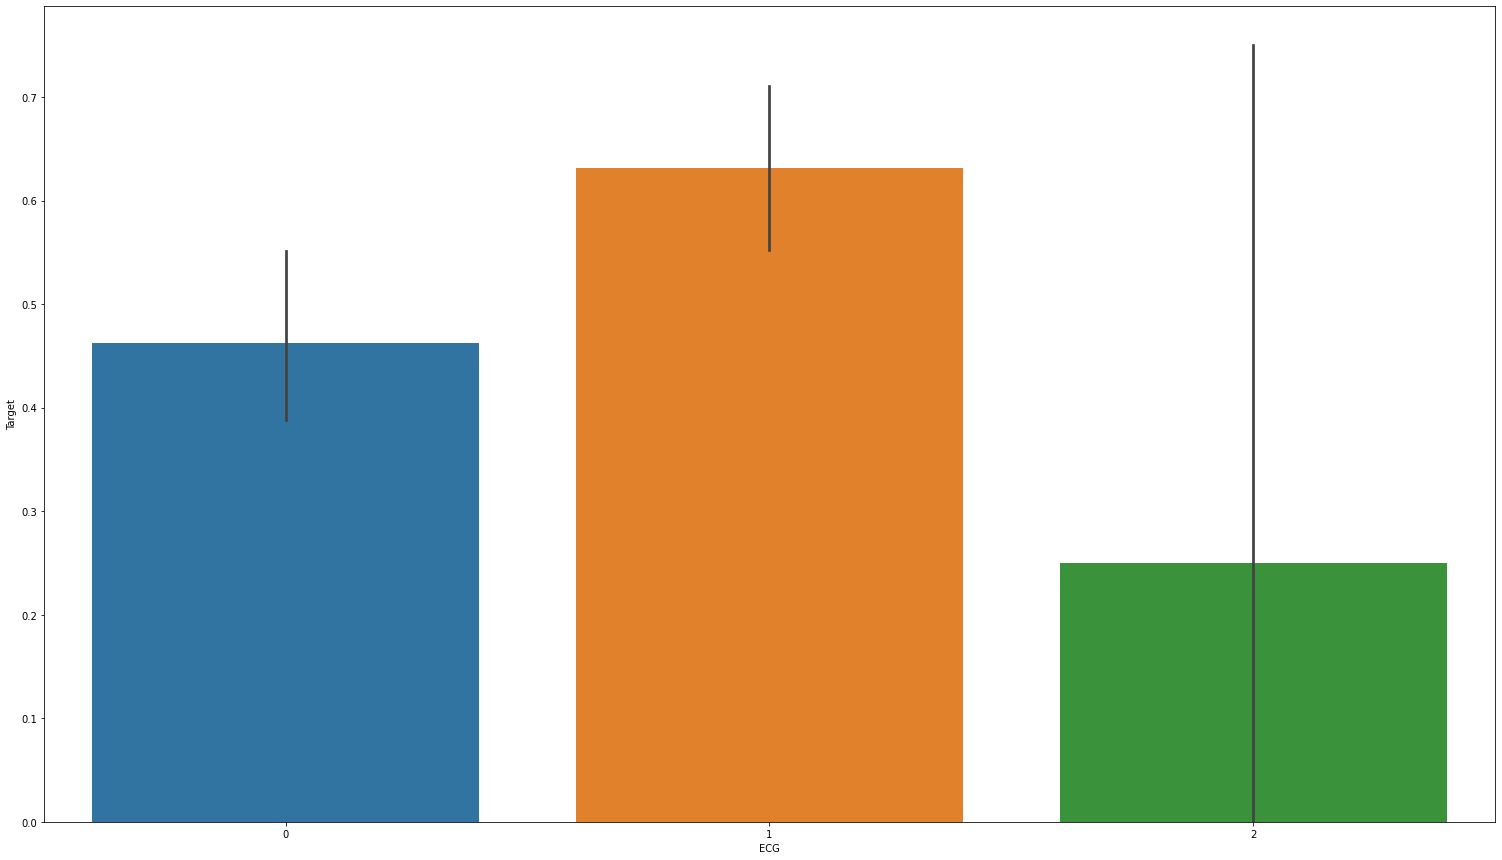

In [28]:
plt.figure(figsize=(26, 15))
sns.barplot(df["ECG"],y)

## people with ECG '1' and '0' are much more likely to have a heart disease than with restecg '2'

## Analysing Exercise Include Angina(1=YES, 0=NO)

In [29]:
df["ExerciseAngina"].unique()


array([0, 1])

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Target'>

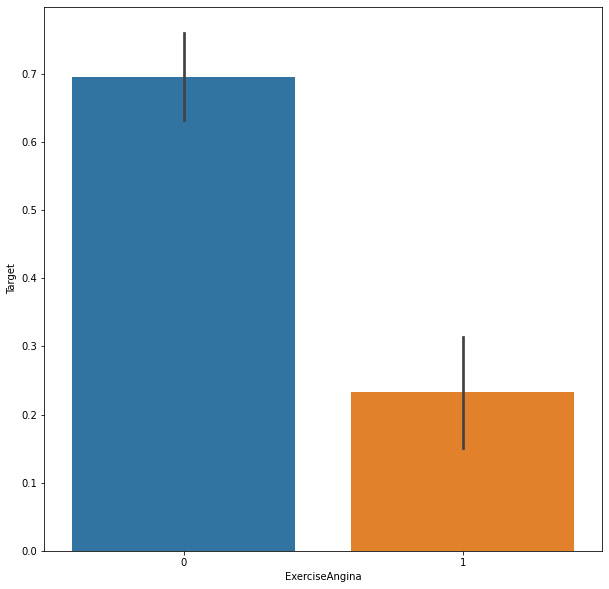

In [30]:
plt.figure(figsize=(10, 10))
sns.barplot(df["ExerciseAngina"],y)

## People with ExerciseAngina=1 are much less likely to have heart problems


## e)	Carry out the chosen analytic task. Show results including intermediate results, as needed

## BloodPressure vs Cholestrol scatterplot

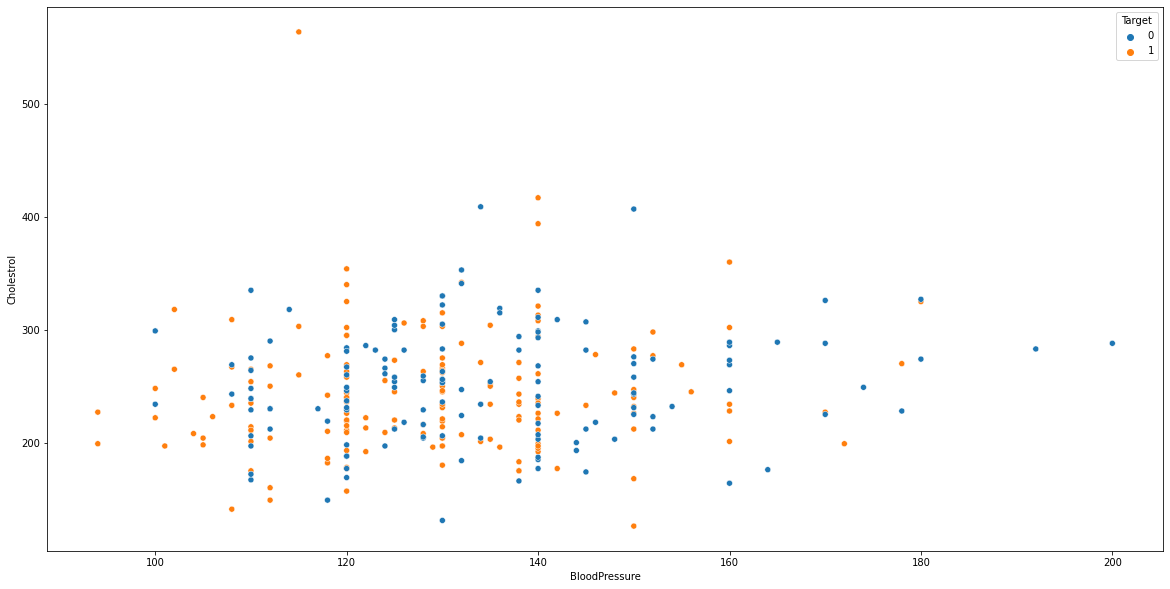

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='BloodPressure',y='Cholestrol',data=df,hue='Target')
plt.show()


## Correlation plot - Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [32]:
# store numeric variables in cnames
cnames=['Age','BloodPressure','Cholestrol','MaxHeartRate']

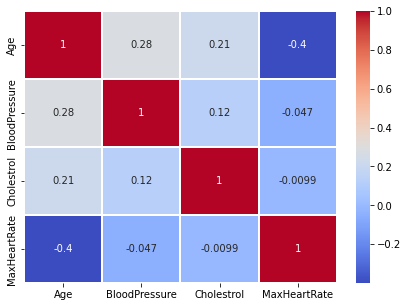

In [33]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = df.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

## Correlation analysis


In [34]:
df_corr = df.loc[:,cnames]
df_corr


,Age,BloodPressure,Cholestrol,MaxHeartRate
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


## Splitting the dataset to Train and Test


In [35]:
from sklearn.model_selection import train_test_split

predictors = df.drop("Target",axis=1)
target = df["Target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [36]:
X_train.shape

(242, 10)

In [37]:
X_test.shape

(61, 10)

In [38]:
Y_train.shape

(242,)

In [39]:
Y_test.shape

(61,)

## Modelling and predicting with Machine Learning - 
The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. 

In [41]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

## f)	Evaluate the solution

## Naive Bayes


In [42]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 78.51%
Test accuracy: 73.77%
[0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1]


## importing Accuracy score


In [44]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 73.77 %


In [45]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 78.51%
Test accuracy: 73.77%


## confusion matrix of Naive Bayes

<AxesSubplot:>

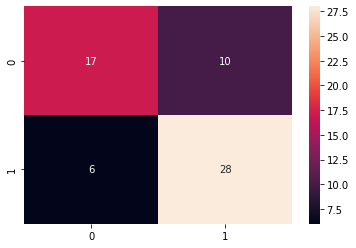

In [46]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")


## precision score


In [47]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)


Precision:  0.7368421052631579


## recall

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, y_pred_nb)
print("Recall is: ",recall)


Recall is:  0.8235294117647058


## f score

In [49]:
print((2*precision*recall)/(precision+recall))

0.7777777777777778


## bad cm style

In [50]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
Target,,
0,17,10
1,6,28


In [51]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model


In [52]:
fnr = FN*100/(FN+TP)
fnr


17.647058823529413

## Final Score

In [53]:
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
score

0.7377049180327869

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

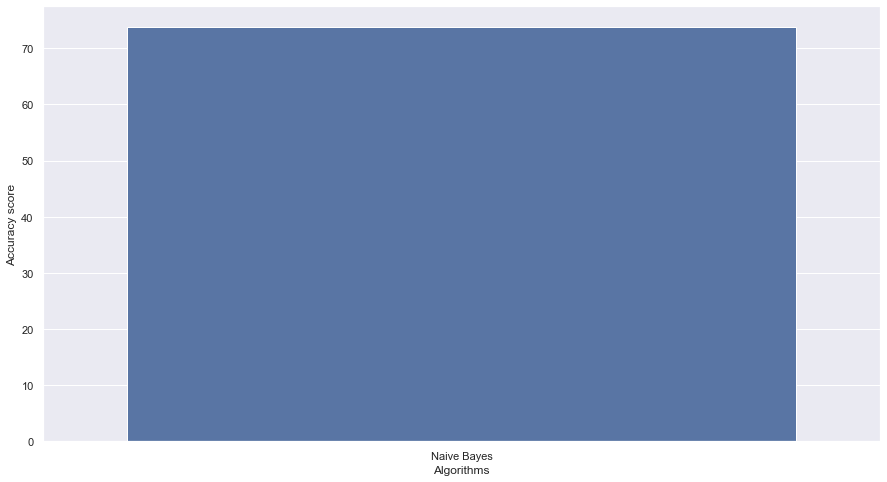

In [54]:
scores = [score*100]
algorithms = ["Naive Bayes"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Naive Bayes gives 73% of the accuracy 